In [66]:
import pandas as pd
import numpy as np

#### Unification

In [67]:
expected_results = pd.read_csv('y_clean.csv', index_col=0)
deepfaune_results = pd.read_csv('deepfaune/results/results_deepfaune2025_11_05_13_58.csv', index_col=0)
speciesnet_results = pd.read_csv('speciesnet/results/results_speciesnet_2025_11_06_7_52.csv', index_col=0)

In [68]:
# remove humans O.O
expected_results = expected_results[expected_results.species != 'human']

In [69]:
speciesnet_results = speciesnet_results.rename(columns={'detected_animal': 'species_speciesnet'})
speciesnet_results.head()

,image,species_speciesnet,confidence
0,../../pictures/01_CZARNE/B/Lato/1/2023-07-16 08-48-23.JPG,empty,0.000000
1,../../pictures/01_CZARNE/B/Lato/1/2023-07-21 06-39-47.JPG,empty,0.000000
2,../../pictures/01_CZARNE/B/Lato/1/2023-07-25 13-56-58.JPG,jay,0.976221
3,../../pictures/01_CZARNE/B/Lato/1/2023-07-28 13-48-47.JPG,jay,0.498219
4,../../pictures/01_CZARNE/B/Lato/1/2023-07-29 08-26-10.JPG,jay,0.756437


In [70]:
deepfaune_results = deepfaune_results.rename(columns={'detected_animal': 'species_deepfaune'})
deepfaune_results.head()

,image,species_deepfaune
0,../../pictures/01_CZARNE/B/Lato/1/2023-07-16 08-48-23.JPG,empty
1,../../pictures/01_CZARNE/B/Lato/1/2023-07-21 06-39-47.JPG,empty
2,../../pictures/01_CZARNE/B/Lato/1/2023-07-25 13-56-58.JPG,bird
3,../../pictures/01_CZARNE/B/Lato/1/2023-07-28 13-48-47.JPG,bird
4,../../pictures/01_CZARNE/B/Lato/1/2023-07-29 08-26-10.JPG,bird


In [71]:
expected_results['image'] = '../../pictures/' + \
    expected_results.RelativePath.str.replace('\\', '/') + \
    '/' + expected_results.File
expected_results = expected_results[['image', 'species']]
expected_results.head()

,image,species
0,../../pictures/01_CZARNE/B/Lato/1/2023-07-16 08-48-23.JPG,bird
1,../../pictures/01_CZARNE/B/Lato/1/2023-07-21 06-39-47.JPG,bird
2,../../pictures/01_CZARNE/B/Lato/1/2023-07-25 13-56-58.JPG,bird
3,../../pictures/01_CZARNE/B/Lato/1/2023-07-28 13-48-47.JPG,bird
4,../../pictures/01_CZARNE/B/Lato/1/2023-07-29 08-26-10.JPG,bird


In [72]:
merged = pd.merge(expected_results, deepfaune_results, on='image', how='left')
merged.head()

,image,species,species_deepfaune
0,../../pictures/01_CZARNE/B/Lato/1/2023-07-16 08-48-23.JPG,bird,empty
1,../../pictures/01_CZARNE/B/Lato/1/2023-07-21 06-39-47.JPG,bird,empty
2,../../pictures/01_CZARNE/B/Lato/1/2023-07-25 13-56-58.JPG,bird,bird
3,../../pictures/01_CZARNE/B/Lato/1/2023-07-28 13-48-47.JPG,bird,bird
4,../../pictures/01_CZARNE/B/Lato/1/2023-07-29 08-26-10.JPG,bird,bird


In [73]:
merged = pd.merge(merged, speciesnet_results, on='image', how='left').drop(columns=['confidence'])
merged

,image,species,species_deepfaune,species_speciesnet
0,../../pictures/01_CZARNE/B/Lato/1/2023-07-16 08-48-23.JPG,bird,empty,empty
1,../../pictures/01_CZARNE/B/Lato/1/2023-07-21 06-39-47.JPG,bird,empty,empty
2,../../pictures/01_CZARNE/B/Lato/1/2023-07-25 13-56-58.JPG,bird,bird,jay
3,../../pictures/01_CZARNE/B/Lato/1/2023-07-28 13-48-47.JPG,bird,bird,jay
4,../../pictures/01_CZARNE/B/Lato/1/2023-07-29 08-26-10.JPG,bird,bird,jay
...,...,...,...,...
30690,../../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-02-22 17-24-47.JPG,fox,fox,red fox
30691,../../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-02-23 12-08-08.JPG,roedeer,roe deer,european roe deer
30692,../../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-03-01 15-46-14.JPG,fox,fox,red fox
30693,../../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-03-01 20-06-01.JPG,marten,mustelid,martes species


Unifying naming

In [74]:
"""
hare - lagomorph:
Zając szarak
Zając bielak
Królik

Wiewiórka pospolita

Bóbr europejski
Piżmak
Nutria

Szakal złocisty
Wilk

rodent:
Kuna domowa
Tchórz zwyczajny
Gronostaj - stoat
Łasica łaska - waesel
Wydra
Norka amerykańska
Kuna leśna - marten

Lis

Ryś
Żbik

Jenot
Szop pracz

Borsuk

Niedźwiedź brunatny

Dzik

Żubr

Daniel

Jeleń wschodni

Jeleń szlachetny - red deer

Łoś

Kozica

Sarna

Muflon

Ptak - bird
"""

'\nhare - lagomorph:\nZając szarak\nZając bielak\nKrólik\n\nWiewiórka pospolita\n\nBóbr europejski\nPiżmak\nNutria\n\nSzakal złocisty\nWilk\n\nrodent:\nKuna domowa\nTchórz zwyczajny\nGronostaj - stoat\nŁasica łaska - waesel\nWydra\nNorka amerykańska\nKuna leśna - marten\n\nLis\n\nRyś\nŻbik\n\nJenot\nSzop pracz\n\nBorsuk\n\nNiedźwiedź brunatny\n\nDzik\n\nŻubr\n\nDaniel\n\nJeleń wschodni\n\nJeleń szlachetny - red deer\n\nŁoś\n\nKozica\n\nSarna\n\nMuflon\n\nPtak - bird\n'

In [75]:
merged.species = merged.species.replace('Empty', 'empty')
merged.species = merged.species.replace('Undefined', 'other')
merged.species = merged.species.replace('reddeer', 'red deer')
merged.species = merged.species.replace('roedeer', 'roe deer')
merged.species = merged.species.replace(['marten', 'weasel', 'stoat', 'mink', 'polecat'], 'mustelid')
merged.species = merged.species.replace('wildboar', 'wild boar')

merged.species.unique()

array(['bird', 'red deer', 'empty', 'hare', 'lynx', 'wolf', 'dog',
       'roe deer', 'wild boar', 'squirrel', 'rodent', 'mustelid',
       'beaver', 'fox', 'otter', 'other', 'badger', 'wildcat', 'bear',
       'raccoon dog', 'bison', 'cat', 'vehicle', 'moose', 'fallow deer'],
      dtype=object)

In [76]:
merged.species_deepfaune = merged.species_deepfaune.replace('lagomorph', 'hare')
merged.species_deepfaune = merged.species_deepfaune.replace('golden jackal', 'wolf')
merged.species_deepfaune = merged.species_deepfaune.replace(
    ['nutria', 'marmot', 'raccoon'],  # dlaczego bobry jako raccoon widzi??
    'beaver'
)
merged.species_deepfaune = merged.species_deepfaune.replace('cow', 'bison')
merged.species_deepfaune = merged.species_deepfaune.replace(
    ['chamois', 'equid', 'goat', 'ibex', 'micromammal', 'mouflon'],
    'other'
)
merged.species_deepfaune = merged.species_deepfaune.replace('reindeer', 'red deer')

merged.species_deepfaune.unique()

array(['empty', 'bird', 'red deer', 'wild boar', 'dog', 'roe deer',
       'squirrel', 'wolf', 'mustelid', 'raccoon dog', 'bear', 'beaver',
       'fox', 'other', 'badger', 'bison', 'otter', 'cat', 'hare',
       'fallow deer', 'lynx', 'moose'], dtype=object)

In [77]:
# when it comes to birds, we can use these, but for now, to compare it:
merged.species_speciesnet = merged.species_speciesnet.replace(
    ['jay', 'blue jay', 'owl', 'common woodpigeon', 'common blackbird',
     'great blue heron', 'american robin', 'golden eagle', 'eurasian buzzard',
     'great black hawk', 'black-billed magpie', 'mourning dove',
     'caprimulgidae family', 'mallard', 'horned lark', 'blood pheasant',
     'american crow', 'hermit thrush', 'pel\'s fishing-owl', 'pileated woodpecker',
     'white stork', 'southern caracara', 'black woodpecker', 'sandhill crane',
     'palawan peacock-pheasant', 'canada goose', 'bald eagle', 'gruiformes order',
     'red-tailed hawk', 'great egret', 'common crane', 'wood duck',
     'ring-necked pheasant', 'european robin', 'wild turkey'],
    'bird'
)
merged.species_speciesnet = merged.species_speciesnet.replace(
    ['snowshoe hare', 'european hare', 'eastern cottontail'],
    'hare'
)
merged.species_speciesnet = merged.species_speciesnet.replace(
    ['eastern fox squirrel', 'eurasian red squirrel', 'eastern gray squirrel',
     'red squirrel', 'sciurus species'],
    'squirrel', 
)
merged.species_speciesnet = merged.species_speciesnet.replace(
    ['garden dormouse', 'peromyscus species'],
    'rodent',  # gryzoń
)
merged.species_speciesnet = merged.species_speciesnet.replace(
    ['martes species', 'pine marten', 'fisher', 'virginia opossum',
     'american mink', 'arizona black-tailed prairie dog', 'ferret badger species',
     'american marten', 'beech marten', 'common palm civet', 'siberian weasel',
     'weasel family'],
    'mustelid',  # łasicowate
)
merged.species_speciesnet = merged.species_speciesnet.replace(
    ['american beaver', 'muskrat', 'north american porcupine', 'nutria',
     'capybara', 'woodchuck'],
    'beaver'
)
merged.species_speciesnet = merged.species_speciesnet.replace(
    ['north american river otter', 'common water rat'],
    'otter'
)
merged.species_speciesnet = merged.species_speciesnet.replace(
    ['american black bear', 'brown bear'],
    'bear'
)
merged.species_speciesnet = merged.species_speciesnet.replace(
    ['grey fox', 'hoary fox', 'puma', 'red fox'],
    'fox'
)
merged.species_speciesnet = merged.species_speciesnet.replace('domestic cat', 'cat')
merged.species_speciesnet = merged.species_speciesnet.replace('domestic dog', 'dog')
merged.species_speciesnet = merged.species_speciesnet.replace(
    ['wild cat', 'leopard cat'],
    'wildcat'
)
merged.species_speciesnet = merged.species_speciesnet.replace(
    ['grey wolf', 'coyote', 'golden jackal'],
    'wolf'
)
merged.species_speciesnet = merged.species_speciesnet.replace(
    ['eurasian badger', 'palawan stink-badger', 'greater hog badger'],
    'badger'
)
merged.species_speciesnet = merged.species_speciesnet.replace(
    ['common duiker', 'elk', 'sambar', 'sika deer', 'sitatunga', 'white-tailed deer'],
    'red deer'
)
merged.species_speciesnet = merged.species_speciesnet.replace(
    ['bobcat', 'eurasian lynx'],
    'lynx'
)
merged.species_speciesnet = merged.species_speciesnet.replace(
    ['bushbuck', 'european roe deer', 'large-antlered muntjac', 'mule deer',
     'pampas deer', 'puku'],
    'roe deer'
)
merged.species_speciesnet = merged.species_speciesnet.replace(
    ['northern raccoon'],
    'raccoon dog'
)
merged.species_speciesnet = merged.species_speciesnet.replace(
    ['american bison', 'european bison', 'african buffalo'],
    'bison'
)
merged.species_speciesnet = merged.species_speciesnet.replace(
    ['northern raccoon'],
    'moose'
)
merged.species_speciesnet = merged.species_speciesnet.replace(
    ['common fallow deer'],
    'fallow deer'
)

merged.species_speciesnet = merged.species_speciesnet.replace(
    ['striped skunk', 'phillipine porcupine', 'indian crested porcupine',  # skąd te jeżozwierze
     'bat', 'domestic horse', 'domestic cattle', 'blue monkey', 'cervidae family',
     'cetartiodactyla order', 'domestic goat', 'domestic sheep', 'golden snub-nosed monkey',
     'hartebeest', 'hoary marmot', 'llama', 'mammal', 'masked palm civet', 'mouflon',
     'mountain tapir', 'nine-banded armadillo', 'northern chamois', 'palawan treeshrew',
     'philippine pangolin', 'possum family', 'pronghorn', 'reeves\' muntjac', 'sable antelope',
     'serval', 'south american coati', 'spotted hyaena', 'western gray kangaroo',
     'white-footed mouse', 'white-tailed mongoose'],
    'other'
)
merged.species_speciesnet = merged.species_speciesnet.replace('blank', 'empty')

merged.species_speciesnet.unique()

array(['empty', 'bird', 'red deer', 'wild boar', 'fallow deer', 'wolf',
       'dog', 'roe deer', 'squirrel', 'mustelid', 'cat', 'raccoon dog',
       'other', 'fox', 'bear', 'badger', 'beaver', 'otter', 'human',
       'hare', 'moose', 'wildcat', 'lynx', 'rodent', 'bison'],
      dtype=object)

In [78]:
merged[merged.species_speciesnet == "white-tailed deer"].species.value_counts()  # xd

Series([], Name: count, dtype: int64)

#### Statistics

In [79]:
merged['deepfaune_correct'] = merged.species == merged.species_deepfaune
merged['speciesnet_correct'] = merged.species == merged.species_speciesnet
merged

,image,species,species_deepfaune,species_speciesnet,deepfaune_correct,speciesnet_correct
0,../../pictures/01_CZARNE/B/Lato/1/2023-07-16 08-48-23.JPG,bird,empty,empty,False,False
1,../../pictures/01_CZARNE/B/Lato/1/2023-07-21 06-39-47.JPG,bird,empty,empty,False,False
2,../../pictures/01_CZARNE/B/Lato/1/2023-07-25 13-56-58.JPG,bird,bird,bird,True,True
3,../../pictures/01_CZARNE/B/Lato/1/2023-07-28 13-48-47.JPG,bird,bird,bird,True,True
4,../../pictures/01_CZARNE/B/Lato/1/2023-07-29 08-26-10.JPG,bird,bird,bird,True,True
...,...,...,...,...,...,...
30690,../../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-02-22 17-24-47.JPG,fox,fox,fox,True,True
30691,../../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-02-23 12-08-08.JPG,roe deer,roe deer,roe deer,True,True
30692,../../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-03-01 15-46-14.JPG,fox,fox,fox,True,True
30693,../../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-03-01 20-06-01.JPG,mustelid,mustelid,mustelid,True,True


In [80]:
N = len(merged)
n_speciesnet_correct = np.sum(merged.speciesnet_correct)
n_deepfaune_correct = np.sum(merged.deepfaune_correct)

In [81]:
print(f'Speciesnet accuracy: {100 * n_speciesnet_correct / N: .2f}%')
print(f'Deepfaune accuracy: {100 * n_deepfaune_correct / N: .2f}%')

Speciesnet accuracy:  75.06%
Deepfaune accuracy:  80.04%


In [82]:
merged[~merged.speciesnet_correct].species.value_counts()

species
red deer       1722
roe deer       1566
beaver          877
bird            624
other           540
bison           538
fox             390
mustelid        308
wild boar       289
squirrel        120
wolf            119
vehicle          94
rodent           92
moose            69
wildcat          58
badger           58
bear             52
raccoon dog      41
otter            27
hare             21
fallow deer      16
lynx             11
empty            11
dog               7
cat               4
Name: count, dtype: int64

In [83]:
merged[~merged.deepfaune_correct].species.value_counts()

species
red deer       1557
roe deer        974
beaver          726
bird            619
other           541
fox             366
wild boar       276
mustelid        249
bison           117
squirrel        113
wolf            106
vehicle          94
rodent           92
wildcat          70
moose            53
badger           47
otter            23
hare             22
empty            21
bear             17
raccoon dog      14
fallow deer      10
lynx              9
dog               7
cat               3
Name: count, dtype: int64

In [84]:
merged.species.value_counts()

species
red deer       12501
roe deer        7608
fox             2144
bird            1461
wild boar       1348
beaver          1271
bison            855
mustelid         585
other            544
empty            502
wolf             392
squirrel         317
moose            277
badger           151
bear             140
vehicle           94
fallow deer       92
rodent            92
hare              81
wildcat           70
raccoon dog       54
dog               49
otter             28
lynx              22
cat               17
Name: count, dtype: int64

In [85]:
merged.species_deepfaune.value_counts()

species_deepfaune
red deer       11076
roe deer        6777
empty           5505
fox             1798
wild boar       1165
bird             866
bison            755
beaver           559
mustelid         374
wolf             354
bear             290
moose            259
squirrel         237
badger           128
cat              101
fallow deer      100
otter             95
raccoon dog       80
hare              74
dog               58
other             27
lynx              17
Name: count, dtype: int64

In [99]:
accuracy_per_species_deepfaune = (
    merged.groupby('species')
      .agg(
          accuracy=('deepfaune_correct', 'mean'),  # mean(True/False)
          count=('deepfaune_correct', 'size')      # number of samples
      )
      .sort_values('accuracy', ascending=False)
)
accuracy_per_species_deepfaune

,accuracy,count
species,,
empty,0.958167,502
fallow deer,0.891304,92
bear,0.878571,140
red deer,0.875450,12501
roe deer,0.871977,7608
bison,0.863158,855
dog,0.857143,49
fox,0.829291,2144
cat,0.823529,17


In [86]:
merged.species_speciesnet.value_counts()

species_speciesnet
red deer       11613
roe deer        6211
empty           5699
fox             1786
wild boar       1218
bird             852
beaver           403
other            383
mustelid         357
bison            319
fallow deer      317
wolf             304
squirrel         254
moose            241
raccoon dog      184
bear             166
badger           114
cat               72
hare              71
otter             50
dog               49
lynx              14
wildcat           13
rodent             4
human              1
Name: count, dtype: int64

In [100]:
accuracy_per_species_speciesnet = (
    merged.groupby('species')
      .agg(
          accuracy=('speciesnet_correct', 'mean'),  # mean(True/False)
          count=('speciesnet_correct', 'size')      # number of samples
      )
      .sort_values('accuracy', ascending=False)
)
accuracy_per_species_speciesnet

,accuracy,count
species,,
empty,0.978088,502
red deer,0.862251,12501
dog,0.857143,49
fallow deer,0.826087,92
fox,0.818097,2144
roe deer,0.794164,7608
wild boar,0.785608,1348
cat,0.764706,17
moose,0.750903,277


In [88]:
pd.set_option('display.max_colwidth', None)
merged[merged.species_deepfaune == 'empty'][-50:-40]

,image,species,species_deepfaune,species_speciesnet,deepfaune_correct,speciesnet_correct
30341,../../pictures/30_SUCHEDNIÓW/B/Wiosna/1/2023-05-31 19-58-10.JPG,red deer,empty,empty,False,False
30345,../../pictures/30_SUCHEDNIÓW/B/Wiosna/1/2023-06-01 04-18-08.JPG,other,empty,empty,False,False
30348,../../pictures/30_SUCHEDNIÓW/B/Wiosna/1/2023-06-01 04-18-34.JPG,red deer,empty,empty,False,False
30349,../../pictures/30_SUCHEDNIÓW/B/Wiosna/1/2023-06-01 04-51-53.JPG,empty,empty,empty,True,True
30350,../../pictures/30_SUCHEDNIÓW/B/Wiosna/1/2023-06-02 03-26-57.JPG,other,empty,empty,False,False
30351,../../pictures/30_SUCHEDNIÓW/B/Wiosna/1/2023-06-02 03-27-04.JPG,other,empty,empty,False,False
30362,../../pictures/30_SUCHEDNIÓW/B/Wiosna/1/2023-06-07 13-54-48.JPG,empty,empty,empty,True,True
30370,../../pictures/30_SUCHEDNIÓW/B/Wiosna/2/2023-04-13 07-07-24.JPG,fox,empty,empty,False,False
30383,../../pictures/30_SUCHEDNIÓW/B/Wiosna/2/2023-04-16 19-49-34.JPG,red deer,empty,empty,False,False
30394,../../pictures/30_SUCHEDNIÓW/B/Wiosna/2/2023-04-19 20-11-44.JPG,empty,empty,empty,True,True


Strasznie ciężkie są do zauważenia te empty... One chyba były ustalane na podstawie innych ujęć tego samego zwierzęcia. Statystyki bez empty:

In [89]:
merged[(merged.species_deepfaune == 'empty') & (merged.species_speciesnet != 'empty')]

,image,species,species_deepfaune,species_speciesnet,deepfaune_correct,speciesnet_correct


Nie ma takich, które by się różniły (no.. ten sam detector to robi)

In [90]:
merged_no_empty = merged[(merged.species_deepfaune != 'empty') | (merged.species == 'empty')]
merged_no_empty

,image,species,species_deepfaune,species_speciesnet,deepfaune_correct,speciesnet_correct
2,../../pictures/01_CZARNE/B/Lato/1/2023-07-25 13-56-58.JPG,bird,bird,bird,True,True
3,../../pictures/01_CZARNE/B/Lato/1/2023-07-28 13-48-47.JPG,bird,bird,bird,True,True
4,../../pictures/01_CZARNE/B/Lato/1/2023-07-29 08-26-10.JPG,bird,bird,bird,True,True
6,../../pictures/01_CZARNE/B/Lato/2/2023-07-18 02-03-23.JPG,red deer,red deer,red deer,True,True
7,../../pictures/01_CZARNE/B/Lato/2/2023-07-18 02-03-30.JPG,red deer,red deer,red deer,True,True
...,...,...,...,...,...,...
30690,../../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-02-22 17-24-47.JPG,fox,fox,fox,True,True
30691,../../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-02-23 12-08-08.JPG,roe deer,roe deer,roe deer,True,True
30692,../../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-03-01 15-46-14.JPG,fox,fox,fox,True,True
30693,../../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-03-01 20-06-01.JPG,mustelid,mustelid,mustelid,True,True


Nie ma takich:

In [91]:
merged_no_empty[(merged_no_empty.species != 'empty') & (merged_no_empty.species == 'empty')]

,image,species,species_deepfaune,species_speciesnet,deepfaune_correct,speciesnet_correct


In [92]:
N_no_empty = len(merged_no_empty)
n_speciesnet_correct_no_empty = np.sum(merged_no_empty.speciesnet_correct)
n_deepfaune_correct_no_empty = np.sum(merged_no_empty.deepfaune_correct)
print(f'Speciesnet accuracy: {100 * n_speciesnet_correct_no_empty / N_no_empty: .2f}%')
print(f'Deepfaune accuracy: {100 * n_deepfaune_correct_no_empty / N_no_empty: .2f}%')

Speciesnet accuracy:  89.75%
Deepfaune accuracy:  95.71%


In [93]:
merged_no_empty.head()

,image,species,species_deepfaune,species_speciesnet,deepfaune_correct,speciesnet_correct
2,../../pictures/01_CZARNE/B/Lato/1/2023-07-25 13-56-58.JPG,bird,bird,bird,True,True
3,../../pictures/01_CZARNE/B/Lato/1/2023-07-28 13-48-47.JPG,bird,bird,bird,True,True
4,../../pictures/01_CZARNE/B/Lato/1/2023-07-29 08-26-10.JPG,bird,bird,bird,True,True
6,../../pictures/01_CZARNE/B/Lato/2/2023-07-18 02-03-23.JPG,red deer,red deer,red deer,True,True
7,../../pictures/01_CZARNE/B/Lato/2/2023-07-18 02-03-30.JPG,red deer,red deer,red deer,True,True


In [102]:
accuracy_per_species_deepfaune_no_empty = (
    merged_no_empty.groupby('species')
      .agg(
          accuracy=('deepfaune_correct', 'mean'),  # mean(True/False)
          count=('deepfaune_correct', 'size')      # number of samples
      )
      .sort_values('accuracy', ascending=False)
)
accuracy_per_species_deepfaune_no_empty

,accuracy,count
species,,
lynx,1.000000,13
bear,0.984000,125
roe deer,0.978899,6777
red deer,0.977492,11196
wild boar,0.977211,1097
fallow deer,0.976190,84
fox,0.966304,1840
mustelid,0.965517,348
wolf,0.962963,297


In [101]:
accuracy_per_species_speciesnet_no_empty = (
    merged_no_empty.groupby('species')
      .agg(
          accuracy=('speciesnet_correct', 'mean'),  # mean(True/False)
          count=('speciesnet_correct', 'size')      # number of samples
      )
      .sort_values('accuracy', ascending=False)
)
accuracy_per_species_speciesnet_no_empty


,accuracy,count
species,,
empty,0.978088,502
wild boar,0.965360,1097
red deer,0.962755,11196
dog,0.954545,44
fox,0.953261,1840
bird,0.941507,889
hare,0.937500,64
wolf,0.919192,297
squirrel,0.912037,216


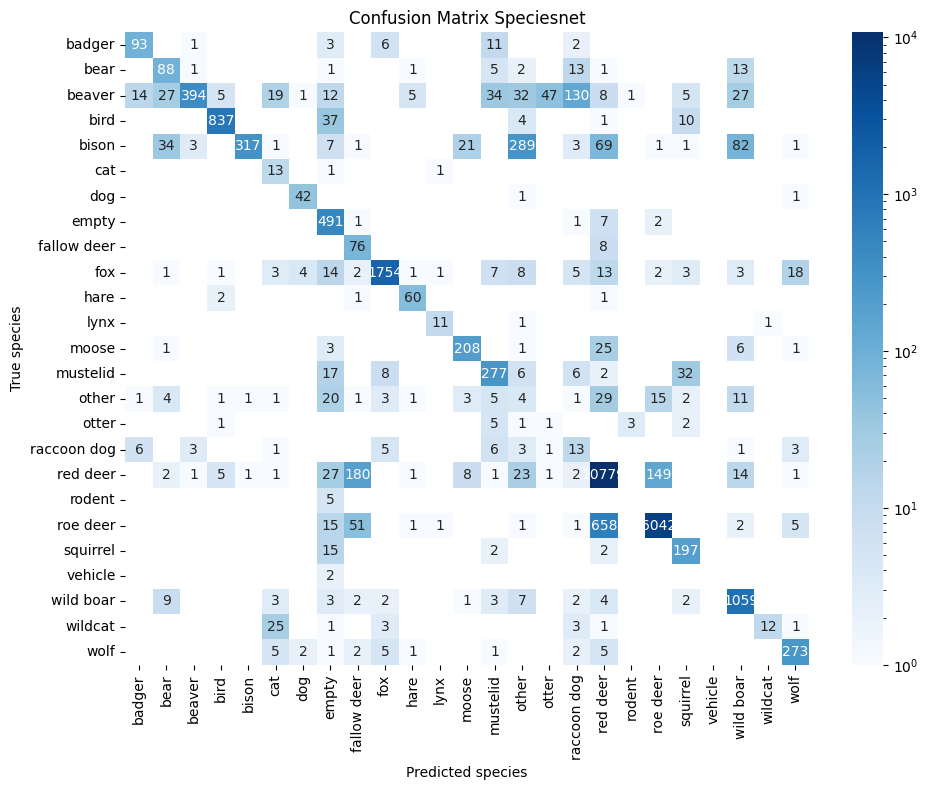

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.metrics import confusion_matrix

# Create confusion matrix
labels = sorted(merged_no_empty['species'].unique())  # consistent ordering
cm = confusion_matrix(merged_no_empty['species'], merged_no_empty['species_speciesnet'], labels=labels)

# Plot it
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            norm=LogNorm(vmin=1, vmax=cm.max()))
plt.xlabel("Predicted species")
plt.ylabel("True species")
plt.title("Confusion Matrix Speciesnet")
plt.tight_layout()
plt.show()

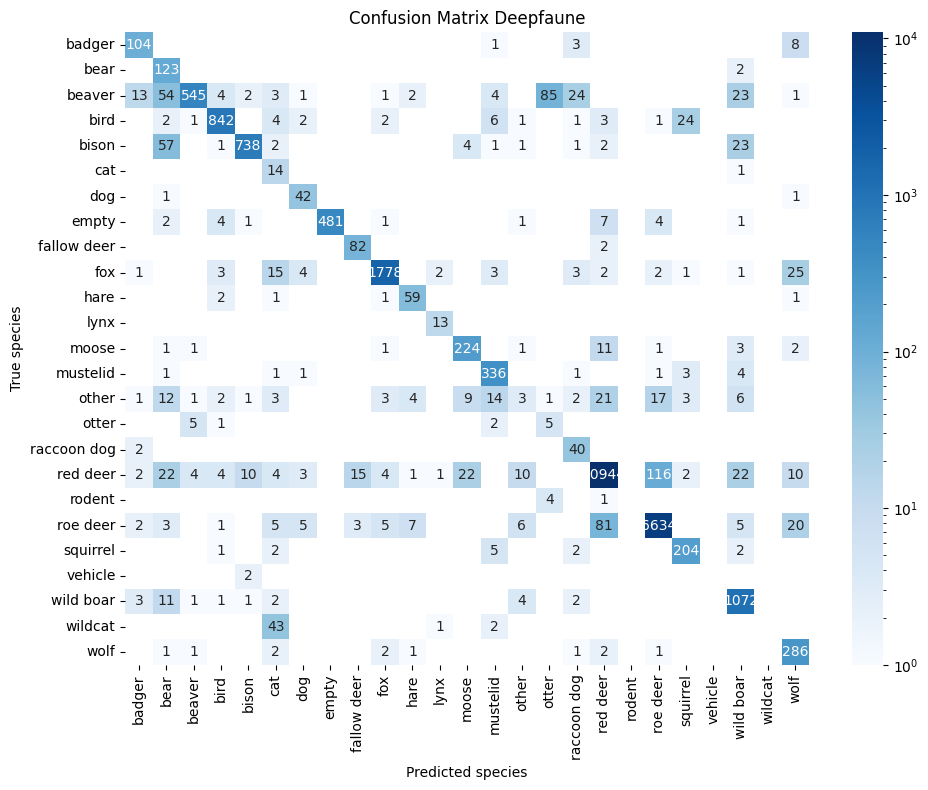

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.metrics import confusion_matrix

# Create confusion matrix
labels = sorted(merged_no_empty['species'].unique())  # consistent ordering
cm = confusion_matrix(merged_no_empty['species'], merged_no_empty['species_deepfaune'], labels=labels)

# Plot it
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            norm=LogNorm(vmin=1, vmax=cm.max()))
plt.xlabel("Predicted species")
plt.ylabel("True species")
plt.title("Confusion Matrix Deepfaune")
plt.tight_layout()
plt.show()